# Theoretical Questions

1.What is unsupervised learning in the context of machine learning?

Unsupervised learning is a type of machine learning where the model learns patterns from data without labeled outputs. The goal is to discover hidden structures like clusters or associations. It is commonly used for tasks like clustering, dimensionality reduction, and anomaly detection. Since there’s no predefined output, the algorithm infers structure from the input alone. Examples include K-Means, DBSCAN, and PCA.



2.How does K-Means clustering algorithm work?

K-Means clustering partitions data into k distinct clusters based on similarity. It starts by initializing k centroids randomly, then assigns each data point to the nearest centroid. The centroids are then updated as the mean of the assigned points. This process repeats until centroids stop moving significantly. The goal is to minimize intra-cluster variance.



3.Explain the concept of a dendrogram in hierarchical clustering.

A dendrogram is a tree-like diagram used to represent the hierarchical relationships between data points. In hierarchical clustering, it shows how clusters are formed step by step, from individual elements to one large cluster. The height of each merge reflects the distance between clusters. You can “cut” the dendrogram at a chosen level to decide the number of clusters.



4.What is the main difference between K-Means and Hierarchical Clustering?

The key difference is in structure and flexibility. K-Means requires the number of clusters k beforehand and is faster for large datasets. Hierarchical clustering doesn’t need k initially and builds a nested cluster structure. Also, K-Means may give different results on different runs, while hierarchical methods are deterministic.



5.What are the advantages of DBSCAN over K-Means?

DBSCAN doesn’t require specifying the number of clusters in advance. It can find clusters of arbitrary shapes and is better at handling noise and outliers. Unlike K-Means, which assumes spherical clusters, DBSCAN groups data based on density. It’s more effective for datasets with irregular cluster shapes and varying densities.

6.When would you use Silhouette Score in clustering?

Silhouette Score is used to evaluate the quality of clustering by measuring how similar a point is to its own cluster vs. other clusters. It helps determine the optimal number of clusters. A higher score indicates better-defined clusters. It's useful when comparing clustering results or tuning k in K-Means.

7.What are the limitations of Hierarchical Clustering?

Hierarchical clustering is computationally expensive for large datasets. It doesn’t scale well due to its O(n²) time complexity. Once a merge or split is made, it cannot be undone (non-reversible). It’s also sensitive to noise and outliers. The choice of linkage method can significantly affect the results.


8.Why is feature scaling important in clustering algorithms like K-Means?

Feature scaling ensures that all features contribute equally to the distance calculations in K-Means. Without scaling, features with larger numerical ranges dominate the clustering. This can lead to biased or incorrect clusters. Common scaling methods include Min-Max normalization and Standardization Z-score.






9.How does DBSCAN identify noise points?

DBSCAN labels points as noise if they don’t have enough neighboring points within a specified radius. These points are not assigned to any cluster. Specifically, a point is noise if it is not a core point and is not reachable from any core point. This helps DBSCAN handle outliers naturally.



10.Define inertia in the context of K-Means.

Inertia is the sum of squared distances between each data point and its assigned cluster centroid. It measures how tightly the data points are grouped in clusters. Lower inertia indicates better clustering, but very low values may lead to overfitting. It’s used in the elbow method to choose the best k.


11.What is the elbow method in K-Means clustering?

The elbow method helps choose the optimal number of clusters k in K-Means. It involves plotting inertia vs. k and identifying the point where the rate of decrease sharply drops, forming an "elbow." This point balances compact clusters and model simplicity. Going beyond the elbow gives minimal improvement.



12.Describe the concept of "density" in DBSCAN.

In DBSCAN, density refers to the number of data points within a given radius eps around a point. A point is a core point if it has at least minPts neighbors in that radius. Density helps DBSCAN group nearby points into clusters and detect sparse areas as noise.



13.Can hierarchical clustering be used on categorical data?

Yes, hierarchical clustering can be applied to categorical data using appropriate distance metrics like Hamming or Jaccard. However, it's less common and more complex than with numerical data. Special techniques or encodings may be needed to calculate distances correctly.



14.What does a negative Silhouette Score indicate?

A negative Silhouette Score means that a data point is likely assigned to the wrong cluster. It is closer to points in a different cluster than its own. This indicates poor clustering structure and suggests the need to adjust cluster parameters or the algorithm used.



15.Explain the term "linkage criteria" in hierarchical clustering.

Linkage criteria determine how distances between clusters are calculated during merging. Common types include single linkage nearest points, complete linkage farthest points, and average linkage mean distances. The choice affects the shape and size of clusters in the resulting dendrogram.

16.Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

K-Means assumes clusters are spherical and similar in size and density. When clusters vary in shape, size, or density, K-Means may incorrectly assign points or split/merge clusters improperly. It also struggles with non-convex shapes and outliers, reducing its clustering accuracy.



17.What are the core parameters in DBSCAN, and how do they influence clustering?

DBSCAN relies mainly on two parameters: eps radius for neighborhood and minPts minimum points to form a dense region. A small eps may lead to too many small clusters or noise, while a large one may merge distinct clusters. minPts controls how strict the density requirement is for forming clusters.



18.How does K-Means++ improve upon standard K-Means initialization?

K-Means++ selects initial centroids more strategically to improve clustering results. It picks the first centroid randomly, then chooses subsequent centroids far from the existing ones based on distance probability. This reduces the chances of poor clustering and speeds up convergence.



19.What is agglomerative clustering?

Agglomerative clustering is a bottom-up hierarchical method. Each data point starts as its own cluster, and the algorithm repeatedly merges the closest pairs of clusters. This continues until all points are in one cluster or a stopping condition is met. It builds a dendrogram to visualize merges.



20.What makes Silhouette Score a better metric than just inertia for model evaluation?

Inertia only considers within-cluster compactness, ignoring how well-separated clusters are. Silhouette Score balances both intra-cluster cohesion and inter-cluster separation. It gives a clearer picture of clustering quality and helps avoid overfitting that inertia alone may not reveal.

# Practical Questions


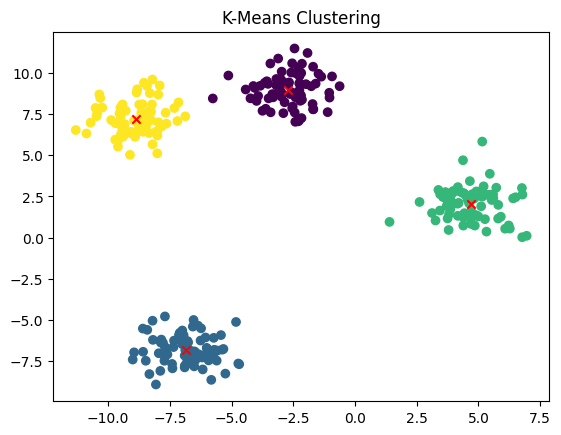

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title("K-Means Clustering")
plt.show()


In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)

print("First 10 cluster labels:", labels[:10])


First 10 cluster labels: [1 1 1 1 1 1 1 1 1 1]


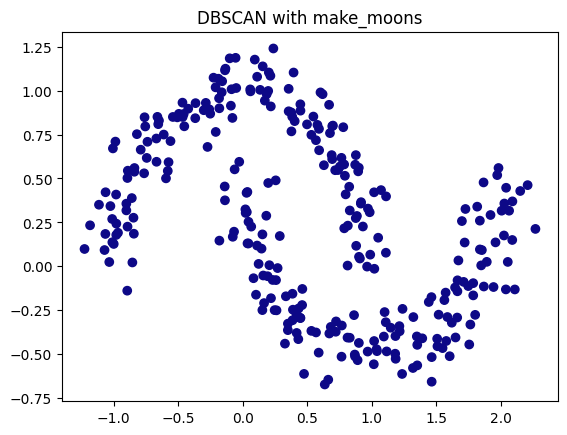

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN with make_moons")
plt.show()


In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


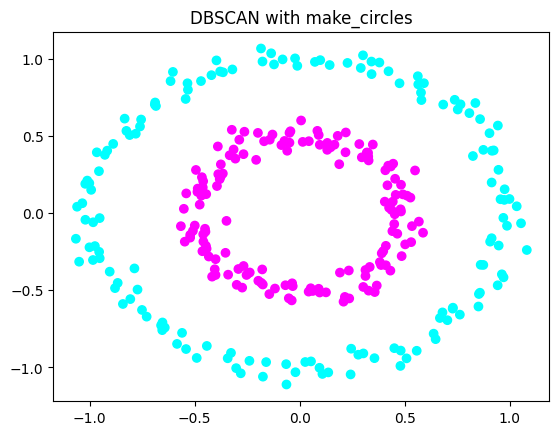

In [5]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='cool')
plt.title("DBSCAN with make_circles")
plt.show()


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


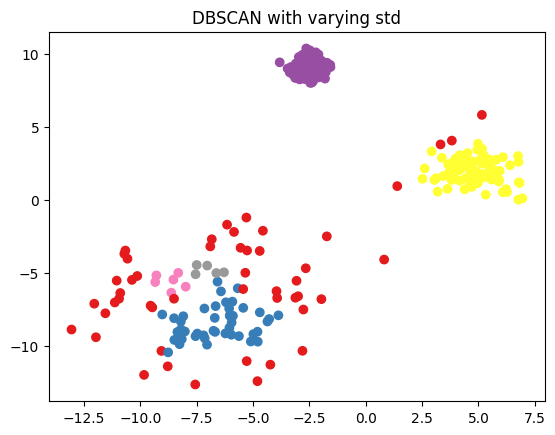

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[0.5, 1.0, 2.5], random_state=42)
db = DBSCAN(eps=0.9, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.title("DBSCAN with varying std")
plt.show()


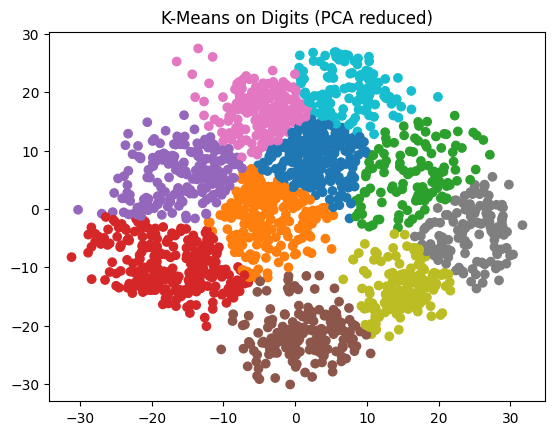

In [8]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X_pca = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("K-Means on Digits (PCA reduced)")
plt.show()


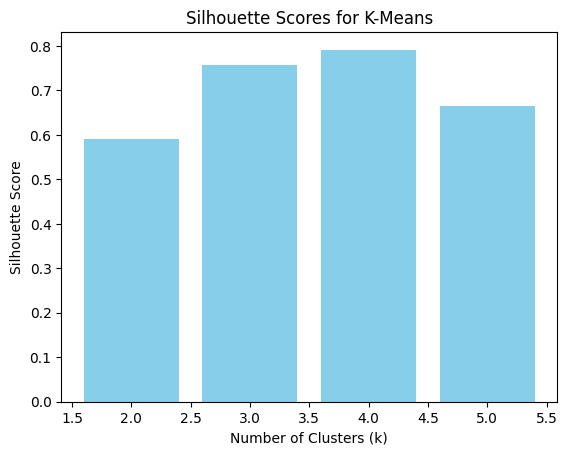

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []
ks = range(2, 6)

for k in ks:
    model = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, model.labels_)
    scores.append(score)

plt.bar(ks, scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K-Means")
plt.show()


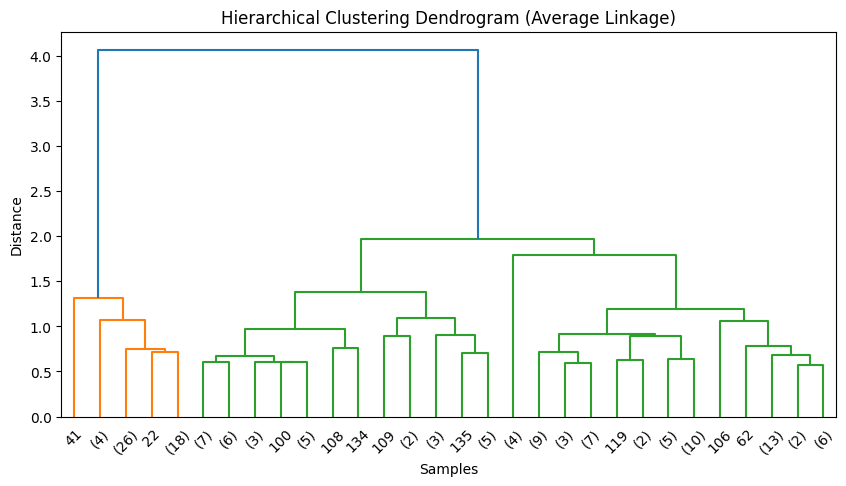

In [10]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
link = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(link, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


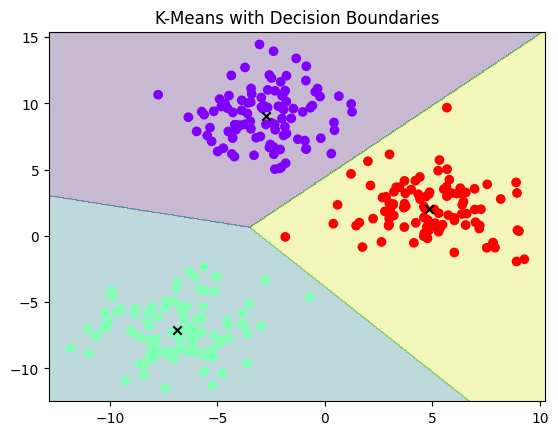

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Create mesh grid for decision boundaries
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')
plt.title("K-Means with Decision Boundaries")
plt.show()


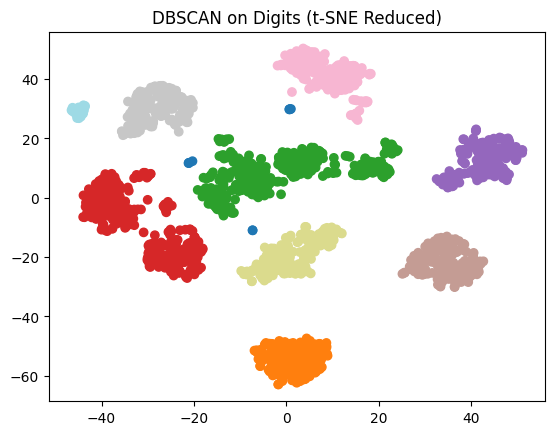

In [12]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
db = DBSCAN(eps=5, min_samples=5).fit(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db.labels_, cmap='tab20')
plt.title("DBSCAN on Digits (t-SNE Reduced)")
plt.show()


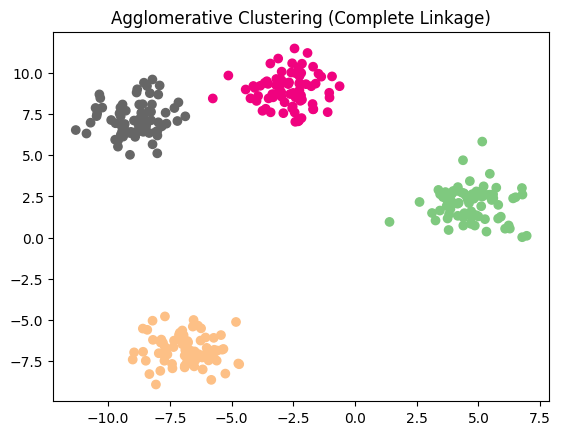

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
model = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


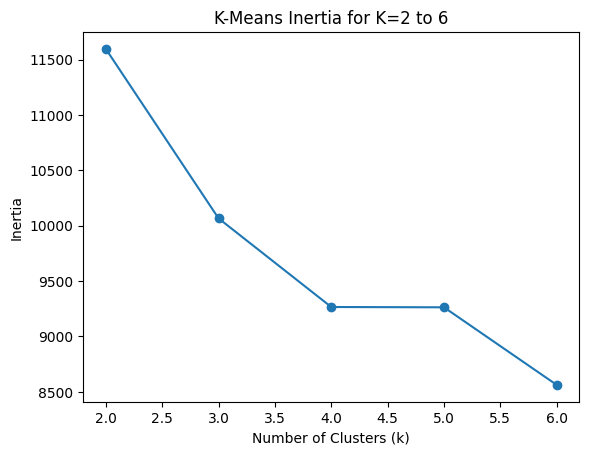

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

inertias = []
ks = range(2, 7)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.plot(ks, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Inertia for K=2 to 6")
plt.show()


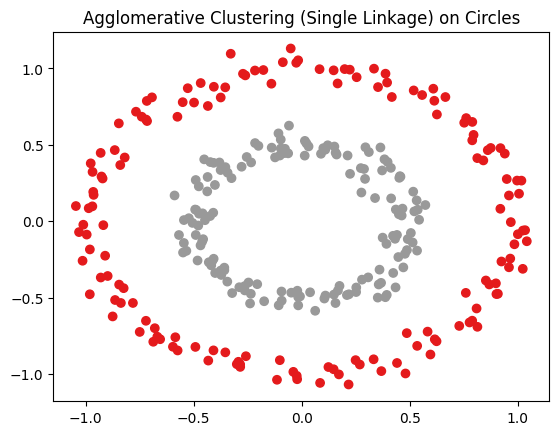

In [15]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
model = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()


In [16]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

data = load_wine()
X = StandardScaler().fit_transform(data.data)
db = DBSCAN(eps=1.2, min_samples=5).fit(X)

labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


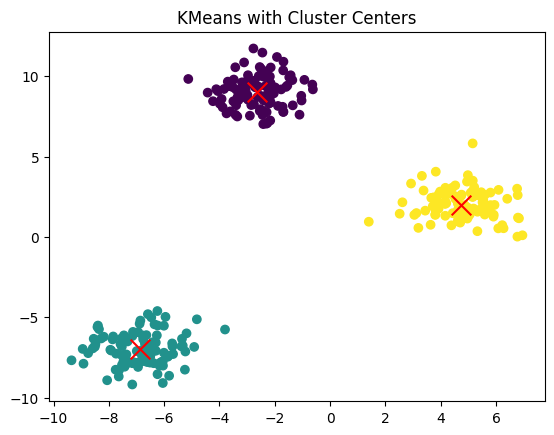

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.title("KMeans with Cluster Centers")
plt.show()


In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

noise_points = np.sum(db.labels_ == -1)
print("Number of noise points:", noise_points)


Number of noise points: 34


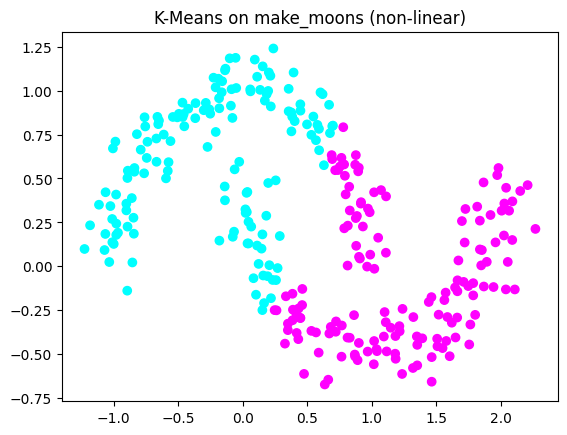

In [19]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='cool')
plt.title("K-Means on make_moons (non-linear)")
plt.show()


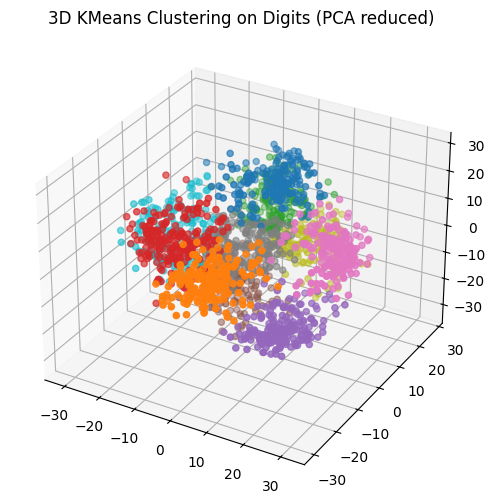

In [20]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X_pca = PCA(n_components=3).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='tab10')
ax.set_title("3D KMeans Clustering on Digits (PCA reduced)")
plt.show()


In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.679


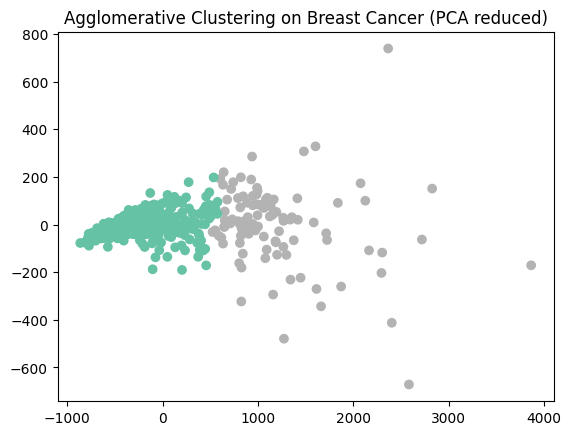

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X_pca = PCA(n_components=2).fit_transform(data.data)
labels = AgglomerativeClustering(n_clusters=2).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set2')
plt.title("Agglomerative Clustering on Breast Cancer (PCA reduced)")
plt.show()


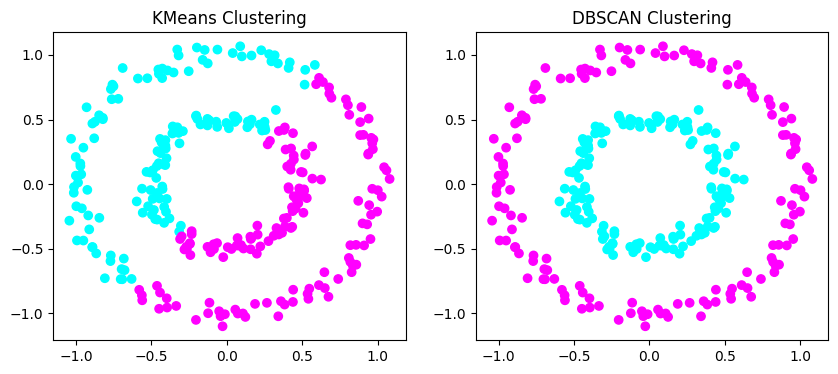

In [23]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='cool')
plt.title("KMeans Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='cool')
plt.title("DBSCAN Clustering")
plt.show()


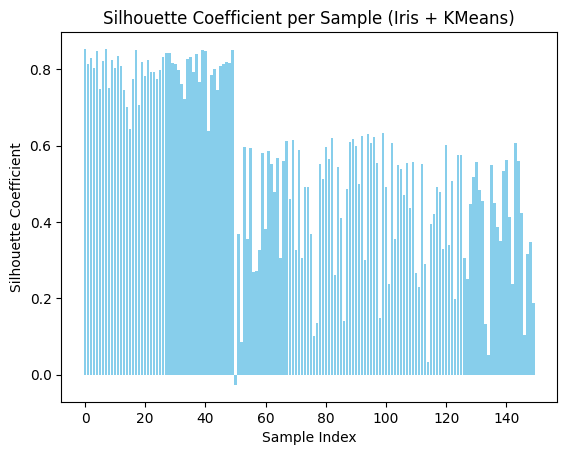

In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
sil_values = silhouette_samples(X, labels)

plt.bar(range(len(X)), sil_values, color='skyblue')
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient per Sample (Iris + KMeans)")
plt.show()


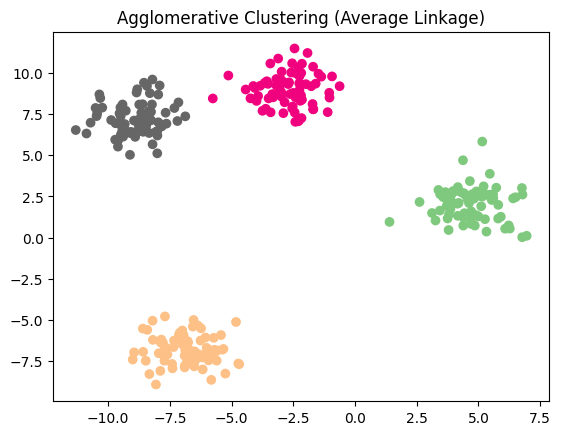

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
model = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


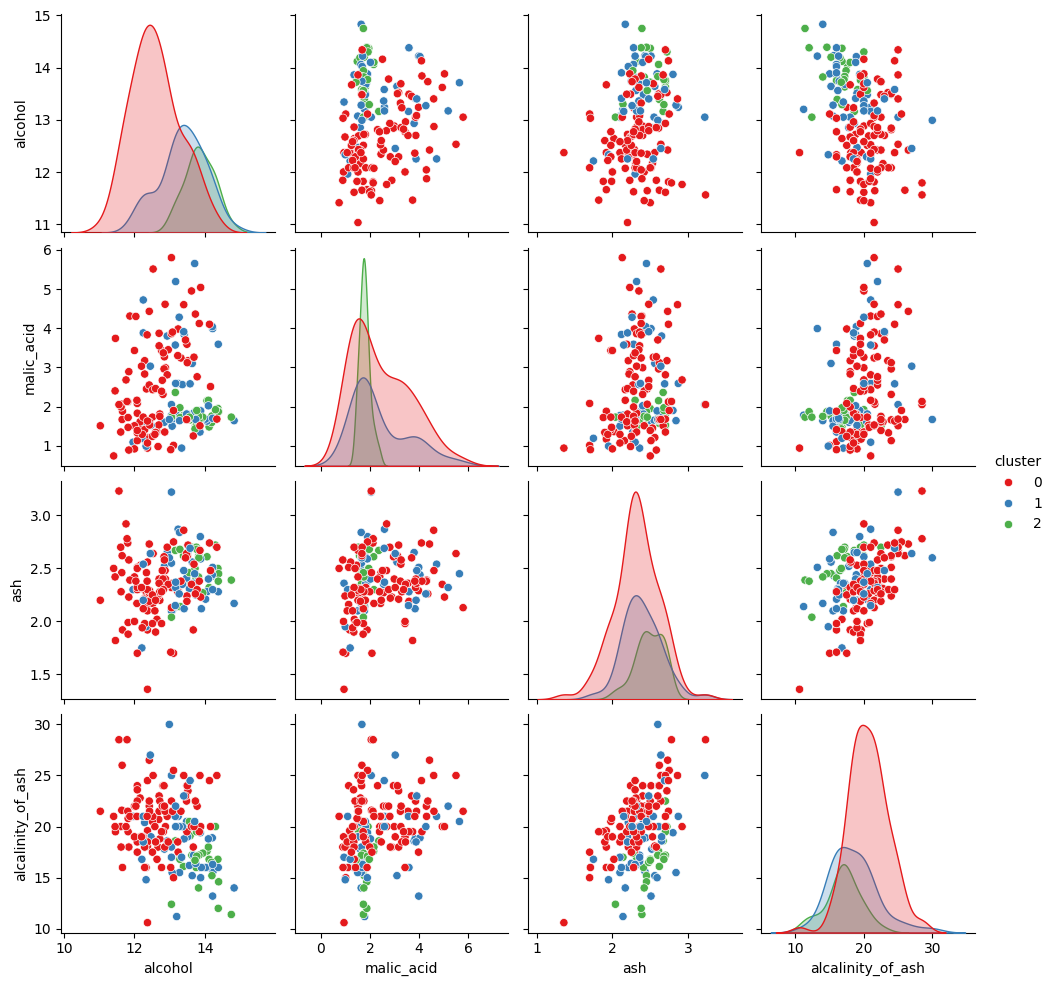

In [26]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(data.data)

sns.pairplot(df.iloc[:, :4].assign(cluster=df['cluster']), hue='cluster', palette='Set1')


In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5, random_state=42)
db = DBSCAN(eps=1.0, min_samples=5).fit(X)

labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)
print("Clusters:", n_clusters)
print("Noise points:", n_noise)


Clusters: 4
Noise points: 32


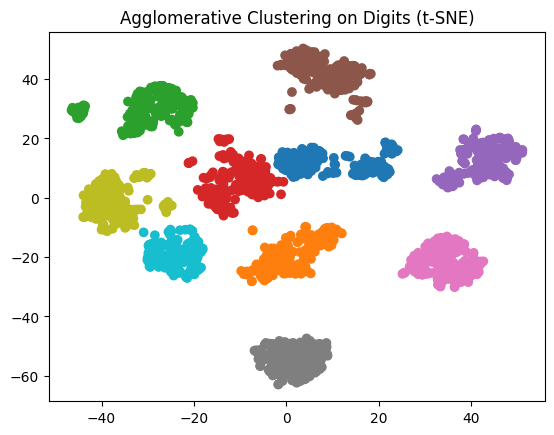

In [28]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
labels = AgglomerativeClustering(n_clusters=10).fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering on Digits (t-SNE)")
plt.show()
